# Morphological Operations - Opening and Closing
---

***Outline:***
1. Preparing Image
2. Erosion
3. Dilatation
4. Disscussion about Erosion and Dilatation
5. Opening and Closing
6. Summary


This notebook demonstrates the use of morphological operations (opening and closing) in image processing.<br>

***Definition of opening:***<br>
The opening operation consists of _Erosion_ followed by _Dilation_.<br>

***Impact on an image:***<br>
Loosely speaking, objects are seperated from each other. Hence, removes small objects and thin lines from an image while preserving the shape and size of larger objects in the image.<br>

***Definition of closing:***<br>
The closing operation consists of _Dilation_ followed by _Erosion_.<br>

***Impact on an image:***<br>
Loosely speaking, objects are connected to each other. Hence, fills small holes in an image while preserving the shape and size of large holes and objects in the image.<br>

#### Prepare Image

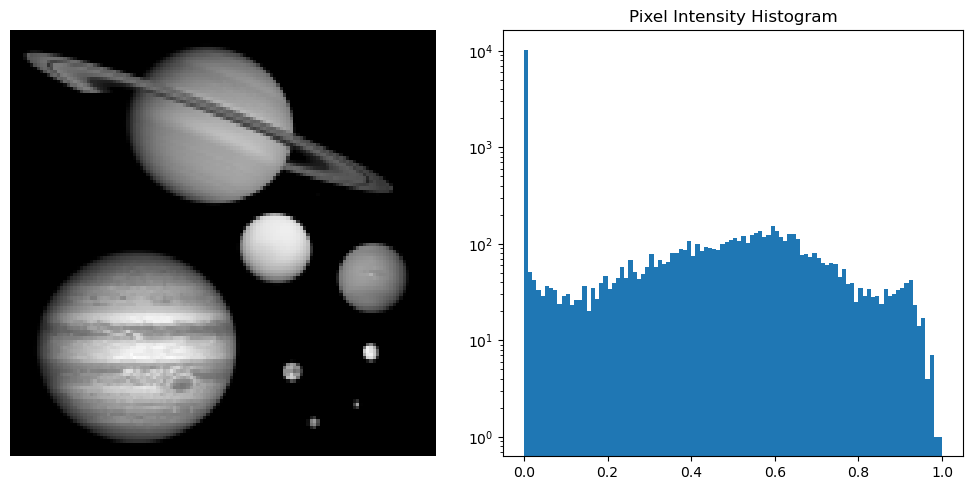

In [310]:
import numpy as np
import matplotlib.pyplot as plt

# load image (image showing solar system)
image = plt.imread('images/planets.jpeg')

# mean image along the 0th axis
image = np.mean(image, axis=-1)

# resize image to 256x256
image = image.reshape(128, 16, 128, 16).mean(axis=(1, 3))

# normalize image
image = (image - image.min()) / (image.max() - image.min())

# plot picture and histogram side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# show image
ax[0].imshow(image, cmap='gray')

# remove axis
ax[0].axis('off')

# show histogram
ax[1].hist(image.flatten(), bins=100)

# log y axis
ax[1].set_yscale('log')

# set title
ax[1].set_title('Pixel Intensity Histogram')

plt.tight_layout()
plt.show()

We are now cutting at a value of 0.2 to get a binary image.

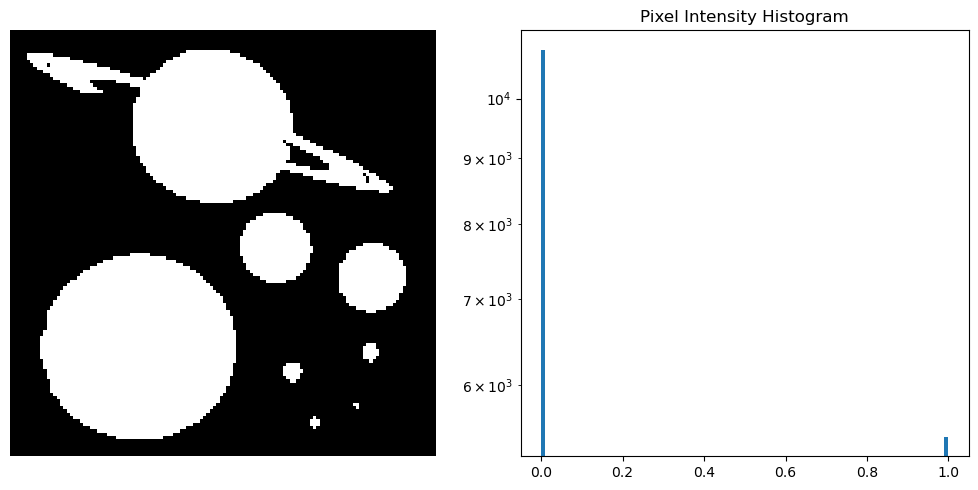

In [311]:
# binary image
binary_image = (image > 0.2).astype(int)

# plot picture and histogram side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# show image
ax[0].imshow(binary_image, cmap='gray')

# remove axis
ax[0].axis('off')

# show histogram
ax[1].hist(binary_image.flatten(), bins=100)

# log y axis
ax[1].set_yscale('log')

# set title
ax[1].set_title('Pixel Intensity Histogram')

plt.tight_layout()
plt.show()

After the cut, it is obvious that the image contains lots of zero values. <br>
The pixels holding value 1 are the oens showing the planets.

### Define Erosion

Erosion is a morphological operation that is used to remove small objects from images.<br>

The erosion operation is defined as follows:<br>

$$(f \ominus s)(x,y) = \bigcap_{(i,j) \in s} f(x+i,y+j)$$

where $f$ is the image, $s$ is the structuring element, and $\ominus$ is the erosion operator.<br>

The erosion operator is defined as follows:<br>

$$f \ominus s = \{x \in E^2 | s_x \subseteq f\}$$

where $f$ is the image, $s$ is the structuring element, and $\ominus$ is the erosion operator.<br>



In [312]:
def erosion_procedure(img, 
                      structuring_element):
    eroded_image = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if np.sum(img[i-1:i+2, j-1:j+2] * structuring_element) == 9:
                eroded_image[i, j] = 1
    return eroded_image


Show the effect of erosion on the image.

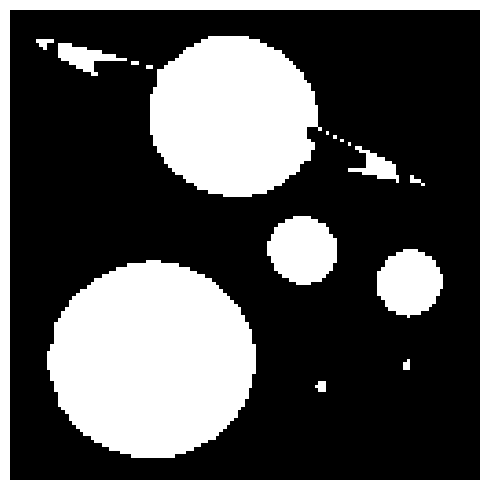

In [313]:
# structuring element for erosion
se_erosion = np.array([ [1., 1., 1.],
                        [1., 1., 1.],
                        [1., 1., 1.]])

# use erosion
eroded_image = erosion_procedure(binary_image, se_erosion)

# set figure size
plt.figure(figsize=(5,5))

# show image
plt.imshow(eroded_image, cmap='gray')

# remove axis
plt.axis('off')

plt.tight_layout()



One can observe that the small objects are removed from the image. Thin lines and also small planets are removed from the image.

### Define Dilation

In [314]:
def dilation_procedure(img, 
                       structuring_element):
    dilated_image = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if np.sum(img[i-1:i+2, j-1:j+2] * structuring_element) >= 1:
                dilated_image[i, j] = 1
    return dilated_image

Show the effect of dilation on the image.

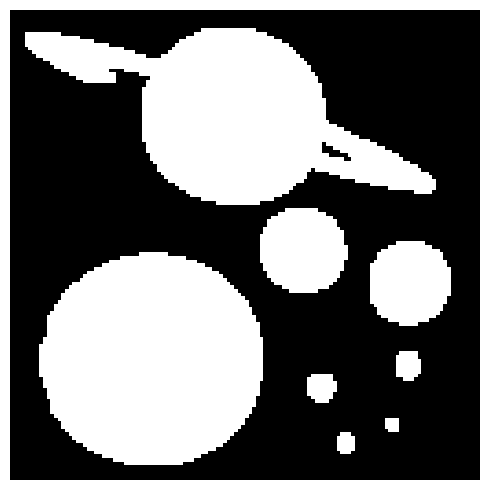

In [315]:
# structuring element for dilation
se_dilation = np.array([ [1., 1., 1.],
                        [1., 1., 1.],
                        [1., 1., 1.]])
# use dilation
dilated_image = dilation_procedure(binary_image, se_dilation)

# set figure size
plt.figure(figsize=(5,5))

# show image
plt.imshow(dilated_image, cmap='gray')

# remove axis
plt.axis('off')

plt.tight_layout()

One can observe that small objects are bigger now. Thin lines and also small planets are bigger now. Little holes are filled.

### Discussion about Erosion and Dilatation

The order of the operations is important. We will make us of that fact in the next section when we define opening and closing.<br>

It is also important to note that since the operations are chosen with fixed size and static values, the goodness of the results depends on the size that is chosen for the structuring element. <br>

For better results, one can train NNs to learn the structuring elements depending on the image. <br>

Now we were able to see the impact of erosion and dilation on the original binary image.<br>

In the following be are going to look at the opening and closing operation which is a mix of erosion and dilation.<br>

### Opening and Closing Operation

In [316]:
def opening(img, se_dil, se_ero):
    eroded_image = erosion_procedure(img, se_ero)
    dilated_image = dilation_procedure(eroded_image, se_dil)
    return dilated_image

def closing(img, se_dil, se_ero):
    dilated_image = dilation_procedure(img, se_dil)
    eroded_image = erosion_procedure(dilated_image, se_ero)
    return eroded_image

Let's use both operations on the binary image and compare the results.

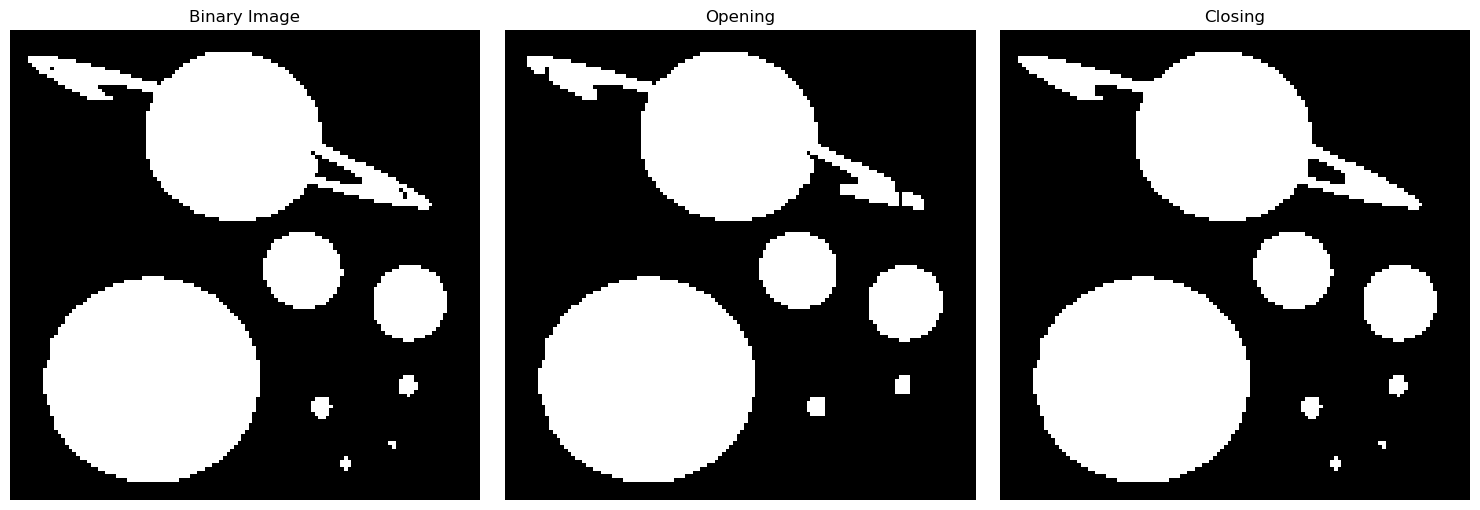

In [317]:
# plot binary image, opening and closing side by side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# show binary image
ax[0].imshow(binary_image, cmap='gray')

# remove axis
ax[0].axis('off')

# set title
ax[0].set_title('Binary Image')

# show opening
ax[1].imshow(opening(binary_image, se_dilation, se_erosion), cmap='gray')

# remove axis
ax[1].axis('off')

# set title
ax[1].set_title('Opening')

# show closing
ax[2].imshow(closing(binary_image, se_dilation, se_erosion), cmap='gray')

# remove axis
ax[2].axis('off')

# set title
ax[2].set_title('Closing')

plt.tight_layout()
plt.savefig('images/opening_closing.png')
plt.show()

Let's also look at the difference between opening and closing vs the binary image.

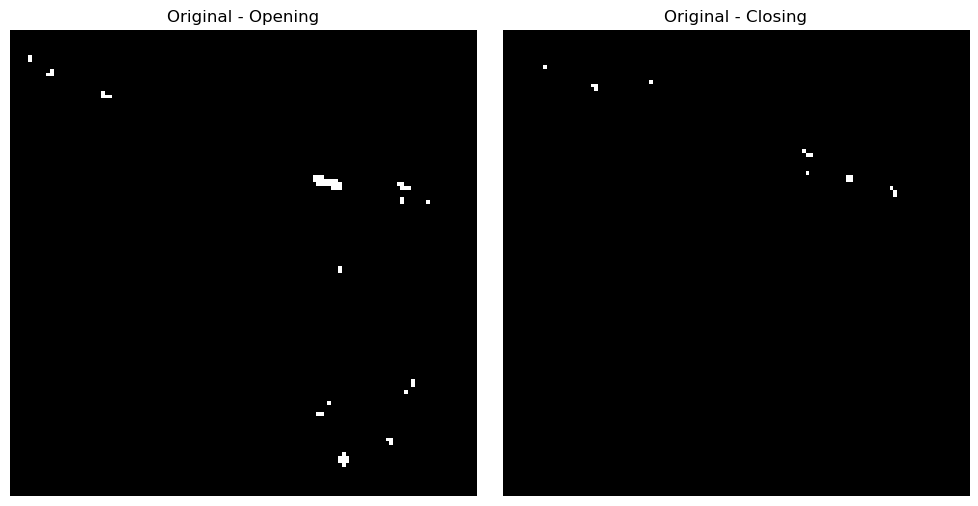

In [318]:
# plot the absolute difference between the original and the opened image and the original and the closed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# show absolute difference between original and opened image
ax[0].imshow(np.abs(binary_image - opening(binary_image, se_dilation, se_erosion)), cmap='gray')

# remove axis
ax[0].axis('off')

# set title
ax[0].set_title('Original - Opening')

# show absolute difference between original and closed image
ax[1].imshow(np.abs(binary_image - closing(binary_image, se_dilation, se_erosion)), cmap='gray')

# remove axis
ax[1].axis('off')

# set title
ax[1].set_title('Original - Closing')

plt.tight_layout()
plt.show()

### Summary

In this notebook, we have seen the impact of erosion and dilation on a binary image. <br>

We have also seen the impact of opening and closing on a binary image. <br>

We have seen that opening removes small objects and thin lines from an image while preserving the shape and size of larger objects in the image. <br>

We have seen that closing fills small holes in an image while preserving the shape and size of large holes and objects in the image. <br>

The order of the operations is important. The chosen size of the structuring element is also important since it determines which objects are removed or filled. <br>

Thanks for reading!
